In [57]:
%pip install opendatasets as 
%pip install sklearn
%pip install matplotlib

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import opendatasets as od
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 15]
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from datetime import datetime as dt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
#  Download dataset
od.download("https://www.kaggle.com/competitions/goodreads-books-reviews-290312/data")

Skipping, found downloaded files in "./goodreads-books-reviews-290312" (use force=True to force download)


In [18]:
df = pd.read_csv("./goodreads-books-reviews-290312/goodreads_train.csv")
dft = pd.read_csv("./goodreads-books-reviews-290312/goodreads_test.csv")


In [19]:
df[['date_added','date_updated','read_at','started_at']] = df[['date_added','date_updated','read_at','started_at']].apply(pd.to_datetime, format='%a %b %d %H:%M:%S -%f %Y',errors='coerce')
dft[['date_added','date_updated','read_at','started_at']] = dft[['date_added','date_updated','read_at','started_at']].apply(pd.to_datetime,format='%a %b %d %H:%M:%S -%f %Y',errors='coerce')

df ['review_length'] = df['review_text'].str.len()
dft ['review_length'] = dft['review_text'].str.len()

In [51]:
df['rating'] = df['rating'].apply(str)

df['read_duration'] = (df['read_at'] - df['started_at']).dt.days.fillna(0)
dft['read_duration'] = (dft['read_at'] - dft['started_at']).dt.days.fillna(0)

df['book_prefix'] = df['book_id'].astype(str).str.slice(stop=3).apply(int)
dft['book_prefix'] = dft['book_id'].astype(str).str.slice(stop=3).apply(int)

df['book_id_len'] = df['book_id'].astype(str).str.len()
dft['book_id_len'] = dft['book_id'].astype(str).str.len()

df.head()
df.size

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,review_length,read_duration,book_prefix,book_id_len
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,2017-07-30 07:44:10.070,2017-08-30 00:00:26.070,2017-08-26 12:05:52.070,2017-08-15 13:23:18.070,28,1,2119,10.0,182,8
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,2016-12-05 10:46:44.080,2017-03-22 11:37:04.070,NaT,NaT,1,0,93,0.0,169,5
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",2016-11-15 11:29:22.080,2017-03-20 23:40:27.070,2017-03-18 23:22:42.070,2017-03-17 23:45:40.070,22,0,2598,0.0,286,8
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,2016-11-09 17:37:04.080,2016-11-09 17:38:20.080,NaT,NaT,5,1,153,0.0,271,8
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",2016-04-25 09:31:23.070,2016-04-25 09:31:23.070,2016-06-26 00:00:00.070,2016-05-28 00:00:00.070,9,1,4044,29.0,258,8


13500000

In [69]:
hist = df.hist()
hist

sns.pairplot(df, hue='rating')

array([[<AxesSubplot:title={'center':'book_id'}>,
        <AxesSubplot:title={'center':'date_added'}>,
        <AxesSubplot:title={'center':'date_updated'}>],
       [<AxesSubplot:title={'center':'read_at'}>,
        <AxesSubplot:title={'center':'started_at'}>,
        <AxesSubplot:title={'center':'n_votes'}>],
       [<AxesSubplot:title={'center':'n_comments'}>,
        <AxesSubplot:title={'center':'review_length'}>,
        <AxesSubplot:title={'center':'read_duration'}>],
       [<AxesSubplot:title={'center':'book_prefix'}>,
        <AxesSubplot:title={'center':'book_id_len'}>, <AxesSubplot:>]],
      dtype=object)

In [53]:
y_train = df[['rating']]
X_train = df[['n_votes','n_comments','review_length','read_duration','book_prefix','book_id_len']]
y_test = df[['rating']]
X_test = df[['n_votes','n_comments','review_length','read_duration','book_prefix','book_id_len']]

In [54]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

pred = regr.predict(X_test).flatten()
dft['rating'] = pd.Series(pred).round().apply(int)
dffinal = dft[['review_id','rating']].to_csv('submission.csv',index=False)



LinearRegression()

In [34]:
import statsmodels.api as sm
X = sm.add_constant(X_train)
model = sm.OLS(y_train.astype(float),X).fit()
model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     651.7
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:53:09   Log-Likelihood:            -1.4784e+06
No. Observations:              900000   AIC:                         2.957e+06
Df Residuals:                  899995   BIC:                         2.957e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.6341      0.002   2089.247      0.000       3.631       3.637
n_votes           0.0008   9.48e-05      8.050      0.000       0.001       0.001
n_comments       -0.0041      0.000    -14.276      0.000      -0.005      -0.004
review_length  5.304e-05   1.07e-06     49.550      0.000    5.09e-05    5.51e-05
read_duration  9.564e-05   2.07e-05      4.615      0.000     5.5e-05       0.000
==============================================================================
Omnibus:                   132006.168   Durbin-Watson:                   1.553
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           200088.902
Skew:                          -1.072   Prob(JB):                         0.00
Kurtosis:                       3.862   Cond. No.                     2.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
from sklearn import tree
import graphviz
from matplotlib import pyplot as plt
clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)

dft['rating'] = pd.Series(clf.predict(X_test))
dffinal = dft[['review_id','rating']].to_csv('submission.csv',index=False)



[Text(0.5, 0.9166666666666666, 'n_votes <= 0.5\ngini = 0.739\nsamples = 900000\nvalue = [30988, 28718, 72627, 188972, 313688, 265007]\nclass = 2'),
 Text(0.25, 0.75, 'review_length <= 132.5\ngini = 0.742\nsamples = 523180\nvalue = [17460, 15697, 45440, 123394, 184368, 136821]\nclass = 2'),
 Text(0.125, 0.5833333333333334, 'read_duration <= 0.5\ngini = 0.753\nsamples = 102004\nvalue = [8141, 3174, 6839, 19738, 33548, 30564]\nclass = 2'),
 Text(0.0625, 0.4166666666666667, 'review_length <= 60.5\ngini = 0.774\nsamples = 54803\nvalue = [6691, 2113, 3866, 10271, 16774, 15088]\nclass = 2'),
 Text(0.03125, 0.25, 'n_comments <= 0.5\ngini = 0.771\nsamples = 23447\nvalue = [3333, 887, 1462, 3835, 7008, 6922]\nclass = 2'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.77\nsamples = 22669\nvalue = [3112, 837, 1409, 3754, 6822, 6735]\nclass = 2'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.785\nsamples = 778\nvalue = [221, 50, 53, 81, 186, 187]\nclass = 5'),
 Text(0.09375, 0.25, 'n_comments <=

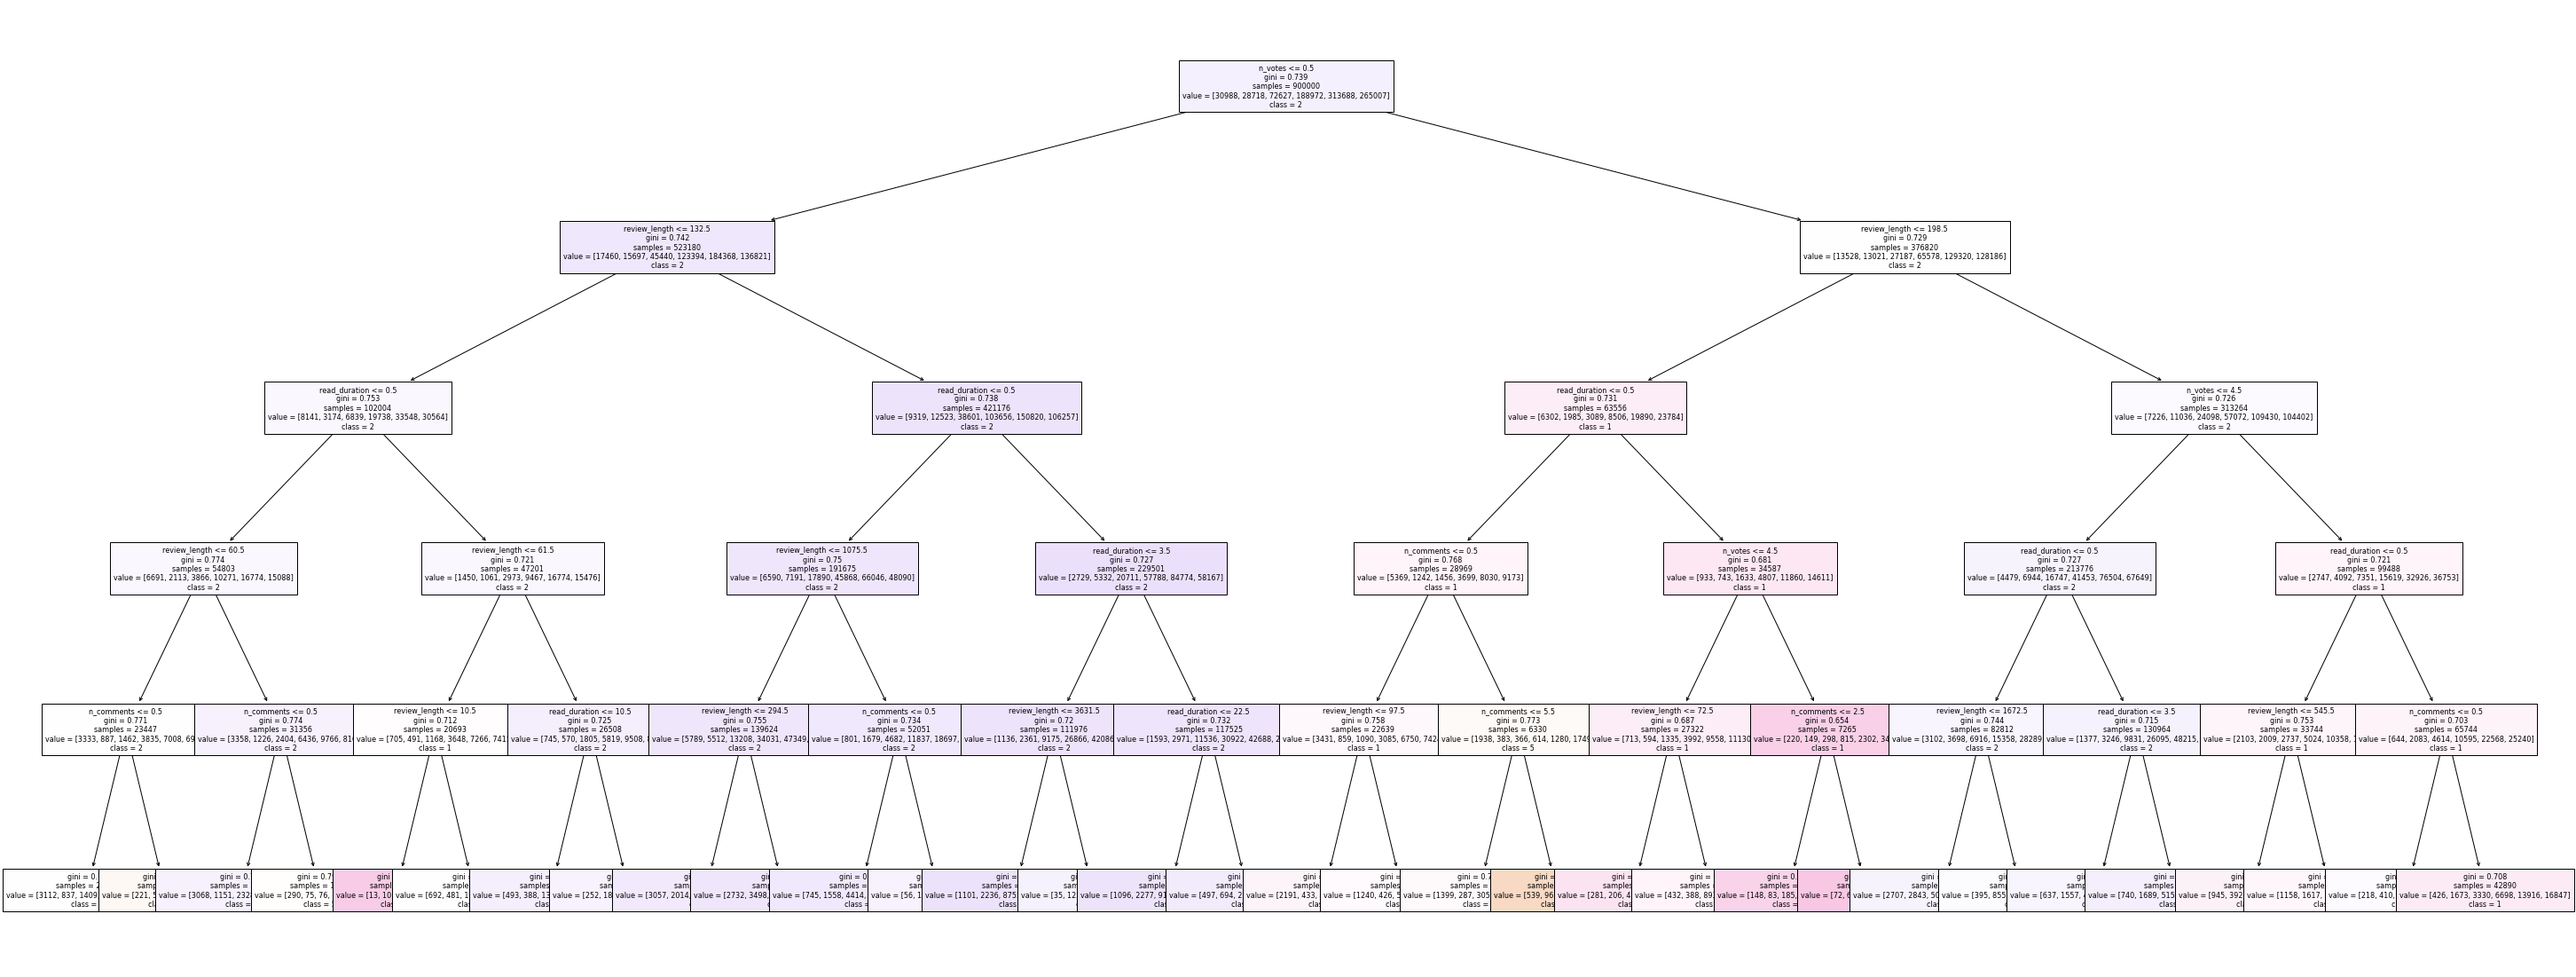

In [12]:
classn = df['rating'].unique().tolist()
featuren = ['n_votes','n_comments','review_length','read_duration']
fig = plt.figure(figsize=(50,20))
plottree = tree.plot_tree(clf,fontsize=8,filled=True, class_names=classn,feature_names=featuren)
plottree